In [1]:
import pandas as pd
import torch
import os
import sys
from torch.utils.data import DataLoader
import time
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from dataset_PAMAP2 import dataset_PAMAP2

In [2]:
no_id_list=[108,109]
dataset=dataset_PAMAP2(no_id_list)

In [3]:
activity_list=[3,4,12,13]
id_test=103
batch_size=32
stepsize=128
train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,stepsize,batch_size)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def plot_accuracies(test_acc_List,stepsize):
    res=test_acc_List
    fig=plt.figure(figsize=(10, 6))
    ax=plt.subplot(polar=True)
    
    ax.set_ylim(0.4,1)
    ax.set_yticks(np.arange(0.5,1,0.1))
    
    id_tests=[101,102,103,104,105,106,107]

    res.append(res[0])
    angles=[i*360/len(id_tests) for i in range(len(id_tests))]
    lines, labels = plt.thetagrids(angles, (id_tests))

    theta = np.linspace(0, 2 * np.pi, len(res))
    plt.plot(theta, res)

    #plt.fill(theta, actual, 'b', alpha=0.1)
    #plt.legend(labels=('Actual'), loc=1)
    
    plt.title("Step = "+str(stepsize))
    plt.show(fig)
    fig.savefig("Step_"+str(stepsize)+".png")
    plt.close(fig) 

# Apprentissage

In [4]:
import models
import importlib
importlib.reload(models)
import pytorch_lightning as pl 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [5]:
def train_model(model, clipping, num_epochs, data_loader_train, data_loader_val, data_loader_test):

    early_stop_callback = EarlyStopping(
      monitor='valid_accuracy',
      min_delta=0.00,
      patience=10,
      verbose=False,
      mode='max'
    )
    trainer = Trainer(max_epochs=num_epochs, gradient_clip_val= clipping, progress_bar_refresh_rate = 40, gpus=1, callbacks=[early_stop_callback])
    trainer.fit(model, data_loader_train, data_loader_val)
    final_results = trainer.logged_metrics
    final_results["test"] = trainer.test(model, data_loader_test)[0]
    final_results["num_epochs"] = trainer.current_epoch
    final_results["num_parameters"] = model.num_paramaters
    return final_results

In [ ]:
model = models.MultiChannelBase(40, [5,5], 256, 4, lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
res=train_model(model, 1, 50, train_data,test_data,test_data)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.600346028804779,
 'test_accuracy_epoch': 0.600346028804779,
 'test_batch_time': 0.00406956672668457,
 'test_batch_time_epoch': 0.0035460060462355614,
 'test_loss': 0.0,
 'test_loss_epoch': 10.622686386108398}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  101  Test Accuracy :  0.600346028804779


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8703703880310059,
 'test_accuracy_epoch': 0.8703703880310059,
 'test_batch_time': 0.00800323486328125,
 'test_batch_time_epoch': 0.0037106217350810766,
 'test_loss': 0.0029412240255624056,
 'test_loss_epoch': 0.8295674324035645}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  102  Test Accuracy :  0.8703703880310059


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9295532703399658,
 'test_accuracy_epoch': 0.9295532703399658,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0038064420223236084,
 'test_loss': 0.4513464868068695,
 'test_loss_epoch': 0.6405293345451355}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  103  Test Accuracy :  0.9295532703399658


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9469808340072632,
 'test_accuracy_epoch': 0.9469808340072632,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0036586991045624018,
 'test_loss': 1.3494622707366943,
 'test_loss_epoch': 0.6523204445838928}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  104  Test Accuracy :  0.9469808340072632


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5191082954406738,
 'test_accuracy_epoch': 0.5191082954406738,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0034432807005941868,
 'test_loss': 0.573615550994873,
 'test_loss_epoch': 7.779058933258057}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  105  Test Accuracy :  0.5191082954406738


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9532062411308289,
 'test_accuracy_epoch': 0.9532062411308289,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.003368308302015066,
 'test_loss': 0.0,
 'test_loss_epoch': 0.21356187760829926}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  106  Test Accuracy :  0.9532062411308289


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9315866231918335,
 'test_accuracy_epoch': 0.9315866231918335,
 'test_batch_time': 0.004985332489013672,
 'test_batch_time_epoch': 0.00457408931106329,
 'test_loss': 0.0,
 'test_loss_epoch': 0.5905157327651978}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  107  Test Accuracy :  0.9315866231918335


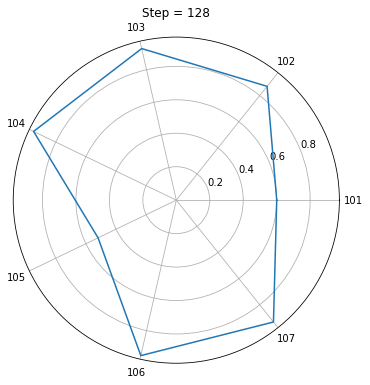

[0.600346028804779, 0.8703703880310059, 0.9295532703399658, 0.9469808340072632, 0.5191082954406738, 0.9532062411308289, 0.9315866231918335, 0.600346028804779]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7339687943458557,
 'test_accuracy_epoch': 0.7339687943458557,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.003924609627574682,
 'test_loss': 35.518924713134766,
 'test_loss_epoch': 4.520656585693359}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  101  Test Accuracy :  0.7339687943458557


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7624821662902832,
 'test_accuracy_epoch': 0.7624821662902832,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.003474587807431817,
 'test_loss': 0.7190657258033752,
 'test_loss_epoch': 0.6718849539756775}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  102  Test Accuracy :  0.7624821662902832


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9276486039161682,
 'test_accuracy_epoch': 0.9276486039161682,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.003794904099777341,
 'test_loss': 0.00046779666445218027,
 'test_loss_epoch': 1.8254809379577637}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  103  Test Accuracy :  0.9276486039161682


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9601476192474365,
 'test_accuracy_epoch': 0.9601476192474365,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0038448995910584927,
 'test_loss': 0.00023640948347747326,
 'test_loss_epoch': 0.7200718522071838}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  104  Test Accuracy :  0.9601476192474365


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5271132588386536,
 'test_accuracy_epoch': 0.5271132588386536,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0031473685521632433,
 'test_loss': 8.577073097229004,
 'test_loss_epoch': 8.25483226776123}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  105  Test Accuracy :  0.5271132588386536


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9765625,
 'test_accuracy_epoch': 0.9765625,
 'test_batch_time': 0.015649795532226562,
 'test_batch_time_epoch': 0.004074593540281057,
 'test_loss': 2.45868676529426e-07,
 'test_loss_epoch': 0.11070415377616882}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  106  Test Accuracy :  0.9765625


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8571428656578064,
 'test_accuracy_epoch': 0.8571428656578064,
 'test_batch_time': 0.015651226043701172,
 'test_batch_time_epoch': 0.0040532979182899,
 'test_loss': 1.94308340549469,
 'test_loss_epoch': 2.3180019855499268}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  107  Test Accuracy :  0.8571428656578064


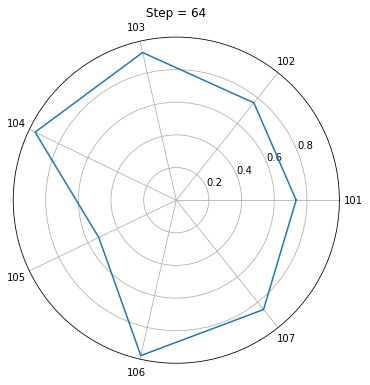

[0.7339687943458557, 0.7624821662902832, 0.9276486039161682, 0.9601476192474365, 0.5271132588386536, 0.9765625, 0.8571428656578064, 0.7339687943458557]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6027753949165344,
 'test_accuracy_epoch': 0.6027753949165344,
 'test_batch_time': 0.004981040954589844,
 'test_batch_time_epoch': 0.004972097929567099,
 'test_loss': 0.0,
 'test_loss_epoch': 17.47236442565918}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  101  Test Accuracy :  0.6027753949165344


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9250802993774414,
 'test_accuracy_epoch': 0.9250802993774414,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004394808784127235,
 'test_loss': 0.9289035797119141,
 'test_loss_epoch': 0.7225814461708069}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  102  Test Accuracy :  0.9250802993774414


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9207238554954529,
 'test_accuracy_epoch': 0.9207238554954529,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004191128071397543,
 'test_loss': 2.90308307739906e-05,
 'test_loss_epoch': 1.5038529634475708}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  103  Test Accuracy :  0.9207238554954529


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9464549422264099,
 'test_accuracy_epoch': 0.9464549422264099,
 'test_batch_time': 0.015654325485229492,
 'test_batch_time_epoch': 0.003437067149206996,
 'test_loss': 1.8636356592178345,
 'test_loss_epoch': 1.026570439338684}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  104  Test Accuracy :  0.9464549422264099


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5273234844207764,
 'test_accuracy_epoch': 0.5273234844207764,
 'test_batch_time': 0.004986286163330078,
 'test_batch_time_epoch': 0.004543778486549854,
 'test_loss': 4.351900577545166,
 'test_loss_epoch': 6.529938697814941}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  105  Test Accuracy :  0.5273234844207764


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.954407274723053,
 'test_accuracy_epoch': 0.954407274723053,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0037074650172144175,
 'test_loss': 0.9007425904273987,
 'test_loss_epoch': 0.5065587162971497}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  106  Test Accuracy :  0.954407274723053


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8600072860717773,
 'test_accuracy_epoch': 0.8600072860717773,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.003719267202541232,
 'test_loss': 1.9236775636672974,
 'test_loss_epoch': 2.1014926433563232}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  107  Test Accuracy :  0.8600072860717773


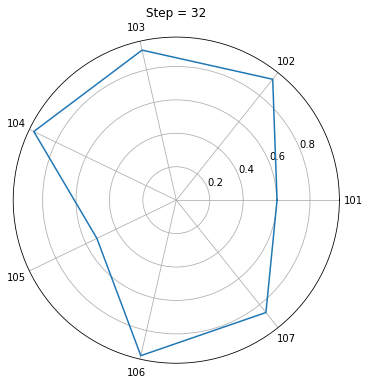

[0.6027753949165344, 0.9250802993774414, 0.9207238554954529, 0.9464549422264099, 0.5273234844207764, 0.954407274723053, 0.8600072860717773, 0.6027753949165344]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6406419277191162,
 'test_accuracy_epoch': 0.6406419277191162,
 'test_batch_time': 0.015622138977050781,
 'test_batch_time_epoch': 0.006236613728106022,
 'test_loss': 9.860005378723145,
 'test_loss_epoch': 6.65726900100708}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  101  Test Accuracy :  0.6406419277191162


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8374375700950623,
 'test_accuracy_epoch': 0.8374375700950623,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004533739294856787,
 'test_loss': 0.6529780626296997,
 'test_loss_epoch': 0.8890488147735596}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  102  Test Accuracy :  0.8374375700950623


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8993534445762634,
 'test_accuracy_epoch': 0.8993534445762634,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0015574092976748943,
 'test_loss': 1.7145997285842896,
 'test_loss_epoch': 1.5923514366149902}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  103  Test Accuracy :  0.8993534445762634


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9547469615936279,
 'test_accuracy_epoch': 0.9547469615936279,
 'test_batch_time': 0.015622377395629883,
 'test_batch_time_epoch': 0.0044229282066226006,
 'test_loss': 0.18859310448169708,
 'test_loss_epoch': 0.4555136561393738}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  104  Test Accuracy :  0.9547469615936279


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5147645473480225,
 'test_accuracy_epoch': 0.5147645473480225,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004102909471839666,
 'test_loss': 15.643186569213867,
 'test_loss_epoch': 11.925056457519531}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  105  Test Accuracy :  0.5147645473480225


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.922659158706665,
 'test_accuracy_epoch': 0.922659158706665,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004277748521417379,
 'test_loss': 0.3127777874469757,
 'test_loss_epoch': 0.5191653966903687}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  106  Test Accuracy :  0.922659158706665


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8832968473434448,
 'test_accuracy_epoch': 0.8832968473434448,
 'test_batch_time': 0.015651226043701172,
 'test_batch_time_epoch': 0.003706729970872402,
 'test_loss': 1.3150187730789185,
 'test_loss_epoch': 1.865684151649475}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  107  Test Accuracy :  0.8832968473434448


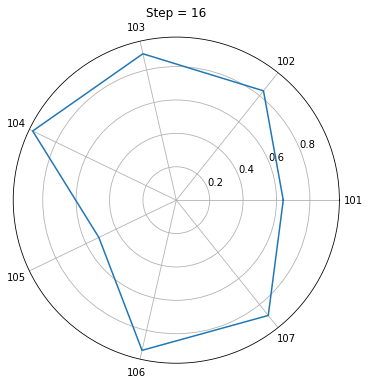

[0.6406419277191162, 0.8374375700950623, 0.8993534445762634, 0.9547469615936279, 0.5147645473480225, 0.922659158706665, 0.8832968473434448, 0.6406419277191162]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6431283354759216,
 'test_accuracy_epoch': 0.6431283354759216,
 'test_batch_time': 0.015624284744262695,
 'test_batch_time_epoch': 0.004231664817780256,
 'test_loss': 8.988430976867676,
 'test_loss_epoch': 6.029513835906982}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  101  Test Accuracy :  0.6431283354759216


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.919782280921936,
 'test_accuracy_epoch': 0.919782280921936,
 'test_batch_time': 0.015621662139892578,
 'test_batch_time_epoch': 0.004396530799567699,
 'test_loss': 1.1217983961105347,
 'test_loss_epoch': 0.5823477506637573}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  102  Test Accuracy :  0.919782280921936


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9133433699607849,
 'test_accuracy_epoch': 0.9133433699607849,
 'test_batch_time': 0.015594005584716797,
 'test_batch_time_epoch': 0.0042605274356901646,
 'test_loss': 2.519289255142212,
 'test_loss_epoch': 1.180240273475647}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  103  Test Accuracy :  0.9133433699607849


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9616663455963135,
 'test_accuracy_epoch': 0.9616663455963135,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.005003583151847124,
 'test_loss': 0.22817625105381012,
 'test_loss_epoch': 0.49735504388809204}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  104  Test Accuracy :  0.9616663455963135


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5336792469024658,
 'test_accuracy_epoch': 0.5336792469024658,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004131207708269358,
 'test_loss': 7.958656311035156,
 'test_loss_epoch': 8.6075439453125}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  105  Test Accuracy :  0.5336792469024658


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9499185085296631,
 'test_accuracy_epoch': 0.9499185085296631,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004565373528748751,
 'test_loss': 0.4538724422454834,
 'test_loss_epoch': 0.3863097131252289}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  106  Test Accuracy :  0.9499185085296631


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 10.2 K
------------------------------------------
26.5 K    Trainable params
0         Non-trainable params
26.5 K    Total params
0.106     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9124566912651062,
 'test_accuracy_epoch': 0.9124566912651062,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0049349479377269745,
 'test_loss': 1.0562081336975098,
 'test_loss_epoch': 1.6126744747161865}
--------------------------------------------------------------------------------
stepsize :  8  id_test :  107  Test Accuracy :  0.9124566912651062


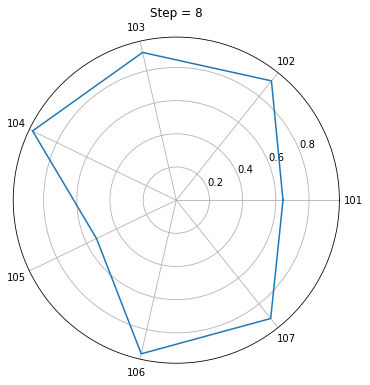

[0.6431283354759216, 0.919782280921936, 0.9133433699607849, 0.9616663455963135, 0.5336792469024658, 0.9499185085296631, 0.9124566912651062, 0.6431283354759216]


In [6]:
activity_list=[3,4,12,13]
batch_size=32
batch_sizes={8:128,16:64,32:32,64:16,128:8}


id_tests=[101,102,103,104,105,106,107]
stepsizes=[128,64,32,16,8]
results=[]
for stepsize in stepsizes:
    for id_test in id_tests:
        
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,stepsize,batch_sizes[stepsize])
        model = models.MultiChannelBase(40, [5,5], 256, 4, lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model, 1, 50, train_data,test_data,test_data)
        print("stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results.append(res['test']['test_accuracy'])
        del model
        torch.cuda.empty_cache()
    plot_accuracies(results,stepsize)
    print(results)
    results=[]